In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
image = cv2.imread("C:/Users/emrem/Desktop/images_part/train/tshirt/141.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

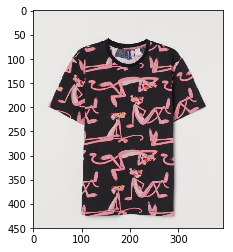

In [3]:
plt.imshow(image)

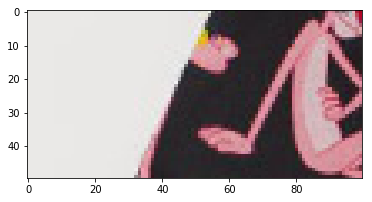

In [5]:
roi = image[150:200,0:100,:]
plt.imshow(roi)

In [4]:
image

array([[[232, 231, 229],
        [232, 231, 229],
        [232, 231, 229],
        ...,
        [230, 229, 227],
        [230, 229, 227],
        [230, 229, 227]],

       [[232, 231, 229],
        [232, 231, 229],
        [233, 232, 230],
        ...,
        [230, 229, 227],
        [230, 229, 227],
        [230, 229, 227]],

       [[233, 232, 230],
        [233, 232, 230],
        [233, 232, 230],
        ...,
        [230, 229, 227],
        [230, 229, 227],
        [230, 229, 227]],

       ...,

       [[231, 230, 228],
        [231, 230, 228],
        [231, 230, 228],
        ...,
        [231, 230, 228],
        [231, 230, 228],
        [231, 230, 228]],

       [[231, 230, 228],
        [231, 230, 228],
        [231, 230, 228],
        ...,
        [231, 230, 228],
        [231, 230, 228],
        [231, 230, 228]],

       [[231, 230, 228],
        [231, 230, 228],
        [231, 230, 228],
        ...,
        [231, 230, 228],
        [231, 230, 228],
        [231, 230, 228]]

In [82]:
white_t = False
pointw = np.array(image[300,200,0:3])
if (pointw[0]<245 and pointw[0]>225) and (pointw[1]<245 and pointw[1]>225)  and (pointw[2]<245 and pointw[2]>225):
    white_fg = True

In [83]:
image = image.reshape((image.shape[0] * image.shape[1], 3))

In [84]:
clt = KMeans(n_clusters = 3)
clt.fit(image)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [85]:
### HISTOGRAM

In [86]:
numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
(hist, _) = np.histogram(clt.labels_, bins = numLabels)
hist = hist.astype("float")

In [87]:
### PLOTTING

In [88]:
centroids = clt.cluster_centers_

In [89]:
index = 0
if white_t == False:
    for i in centroids:
        if (i[0]<237 or i[0]>225) and (i[1]<237 or i[1]>225)  and (i[2]<237 or i[2]>225):
            break
        index += 1
    centroids = np.delete(centroids,index,0)
    hist = np.delete(hist,index,0)

In [90]:
hist /= hist.sum()

bar = np.zeros((50, 300, 3), dtype = "uint8")
startX = 0
for (percent, color) in zip(hist, centroids):
		# plot the relative percentage of each cluster
		endX = startX + (percent * 300)
		cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),color.astype("uint8").tolist(), -1)
		startX = endX

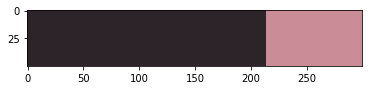

In [91]:
plt.imshow(bar)

In [92]:
centroids

array([[ 45.74435264,  36.43331324,  41.03085216],
       [202.59268227, 140.05438974, 150.51703883]])

In [93]:
hist

array([0.71657625, 0.28342375])

In [94]:
index

0

([<matplotlib.patches.Wedge at 0x1bde7d1a940>,
 [Text(-0.69201,0.855057,''), Text(0.69201,-0.855057,'')])

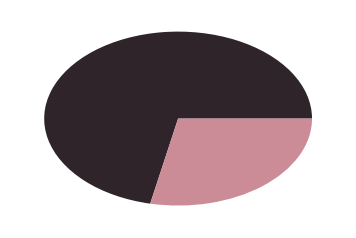

In [95]:
plt.pie(hist,colors=centroids/255)